In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import weather map wrapper
import openweathermapy as owm

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
#create cities dataframe
cities_df = pd.DataFrame(cities)

#rename header for cities column
cities_df = cities_df.rename(columns={0: 'City'})
cities_df

,City
0,asau
1,longyearbyen
2,skeldon
3,busselton
4,sola
...,...
597,miandrivazo
598,ligayan
599,meadow lake
600,lavrentiya


In [4]:
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = "" 
cities_df["Lat"] = ""
cities_df["Lng"]  = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""
# cities_df.head()

#wrapper
settings = {"units": "imperial", "appid": api_key}

#create weather series
wx_data_series = []

#counter for api calls to set limit at 60
api_calls = 0

# error = 0

# print("Retrieving Data")

for index, row in cities_df.iterrows():
    try:
        wx_data_series.append(owm.get_current(row[0], **settings))
        print(f'City # {index}: {row[0]}')
        cities_df.loc[index, "Cloudiness"] = wx_data_series[index]["clouds"]["all"]
        cities_df.loc[index, "Country"] = wx_data_series[index]["sys"]["country"]
        cities_df.loc[index, "Date"] = wx_data_series[index]["dt"]
        cities_df.loc[index, "Humidity"] = wx_data_series[index]["main"]["humidity"]
        cities_df.loc[index, "Lat"] = wx_data_series[index]["coord"]["lat"]
        cities_df.loc[index, "Lng"] = wx_data_series[index]["coord"]["lon"]
        cities_df.loc[index, "Max Temp"] = wx_data_series[index]["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"] = wx_data_series[index]["wind"]["speed"]
        
    except Exception as e:

        wx_data_series.append(f"{row[0]} not found.")
#         error +=1
        
    api_calls +=1
    
    if api_calls >=60:
#         print("----------PAUSE FOR API CALLS LIMIT----------")
        time.sleep(60)
        api_calls = 0
        
    continue
    
# print("Data Retrieval Complete")

City # 1: longyearbyen
City # 2: skeldon
City # 3: busselton
City # 4: sola
City # 7: vaini
City # 8: jurm
City # 9: arraial do cabo
City # 10: soyo
City # 11: touros
City # 12: mataura
City # 14: trinidad
City # 16: puerto ayora
City # 17: tiksi
City # 18: yellowknife
City # 19: leningradskiy
City # 20: kloulklubed
City # 21: lebu
City # 22: jamestown
City # 23: hermanus
City # 27: dikson
City # 28: hobart
City # 30: ahuimanu
City # 34: nikolskoye
City # 35: bluff
City # 36: deputatskiy
City # 37: bambous virieux
City # 38: new norfolk
City # 39: castro
City # 40: alofi
City # 41: namibe
City # 42: cape town
City # 43: geraldton
City # 44: hilo
City # 45: mar del plata
City # 46: cidreira
City # 47: faanui
City # 48: sibate
City # 49: hithadhoo
City # 51: chokurdakh
City # 52: georgetown
City # 53: yakeshi
City # 54: rikitea
City # 55: zhigansk
City # 56: ushuaia
City # 57: talnakh
City # 58: sao filipe
City # 59: naze
City # 60: fairbanks
City # 61: mandalgovi
City # 62: mehamn
City 

City # 455: neftcala
City # 456: la palma
City # 457: lagos
City # 458: kutum
City # 459: jatara
City # 460: rorvik
City # 461: lodwar
City # 462: maunabo
City # 463: quatre cocos
City # 464: verkhoyansk
City # 465: sucua
City # 466: sao joao da barra
City # 467: bahia blanca
City # 468: oleksandrivka
City # 469: port lincoln
City # 470: houma
City # 471: lasa
City # 472: cardoso
City # 473: kasama
City # 474: reyes
City # 475: barcelona
City # 476: kaduna
City # 477: wabash
City # 478: praia
City # 479: port keats
City # 480: langwedel
City # 481: thaton
City # 482: mogapi
City # 483: hervey bay
City # 484: mucuri
City # 485: kendari
City # 486: muros
City # 487: oranjemund
City # 489: general roca
City # 490: richards bay
City # 491: poya
City # 492: wajid
City # 493: kyren
City # 494: icod de los vinos
City # 495: makubetsu
City # 496: keti bandar
City # 498: lewistown
City # 499: kahului
City # 500: westport
City # 501: namtsy
City # 502: deniliquin
City # 503: te anau
City # 504: 

In [5]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,asau,,,,,,,,
1,longyearbyen,90,NO,1574571491,85,78.22,15.63,19.4,10.29
2,skeldon,61,GY,1574571753,82,5.88,-57.13,80.87,12.26
3,busselton,100,AU,1574571334,22,-33.64,115.35,81,12.91
4,sola,100,TZ,1574571753,88,-3.17,33.8,65.12,4.56
...,...,...,...,...,...,...,...,...,...
597,miandrivazo,60,MG,1574572375,53,-19.53,45.46,85.32,1.86
598,ligayan,15,PH,1574572375,66,4.65,119.47,84.42,2.46
599,meadow lake,53,CA,1574572375,81,54.13,-108.44,32.34,10.51
600,lavrentiya,17,RU,1574572435,78,65.58,-170.99,10.74,16.91


In [6]:
cities_df['Cloudiness'].replace('', np.nan, inplace=True)

In [7]:
cities_df.dropna(subset=['Cloudiness'],inplace=True)

In [8]:
cities_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [9]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,longyearbyen,90.0,NO,1574571491,85,78.22,15.63,19.4,10.29
2,skeldon,61.0,GY,1574571753,82,5.88,-57.13,80.87,12.26
3,busselton,100.0,AU,1574571334,22,-33.64,115.35,81,12.91
4,sola,100.0,TZ,1574571753,88,-3.17,33.8,65.12,4.56
7,vaini,0.0,IN,1574571399,64,15.34,74.49,73.4,11.41
...,...,...,...,...,...,...,...,...,...
597,miandrivazo,60.0,MG,1574572375,53,-19.53,45.46,85.32,1.86
598,ligayan,15.0,PH,1574572375,66,4.65,119.47,84.42,2.46
599,meadow lake,53.0,CA,1574572375,81,54.13,-108.44,32.34,10.51
600,lavrentiya,17.0,RU,1574572435,78,65.58,-170.99,10.74,16.91


In [10]:
cities_df.to_csv("Cities.csv", encoding="utf-8", index=False)

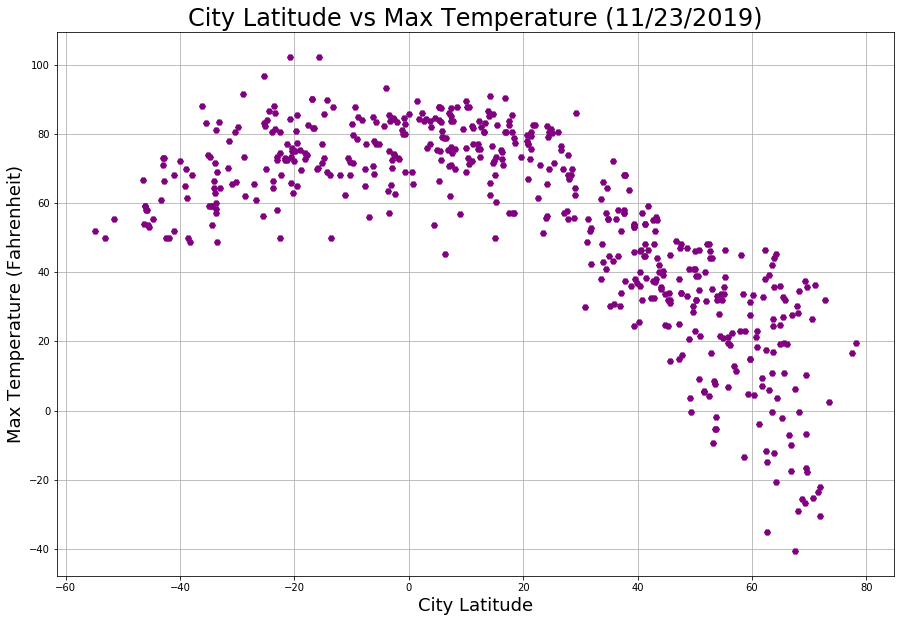

In [28]:
# Temperature (F) vs. Latitude

plt.figure(figsize=(15, 10))
plt.grid(True, zorder=1)
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], marker="H", color = 'purple', zorder=2)
plt.title(f"City Latitude vs Max Temperature (" + time.strftime("%m/%d/%Y") + ")", fontsize=24)
plt.xlabel("City Latitude", fontsize=18)
plt.ylabel("Max Temperature (Fahrenheit)", fontsize=18)
plt.savefig("LATvsMAXTEMP.png")
plt.show()

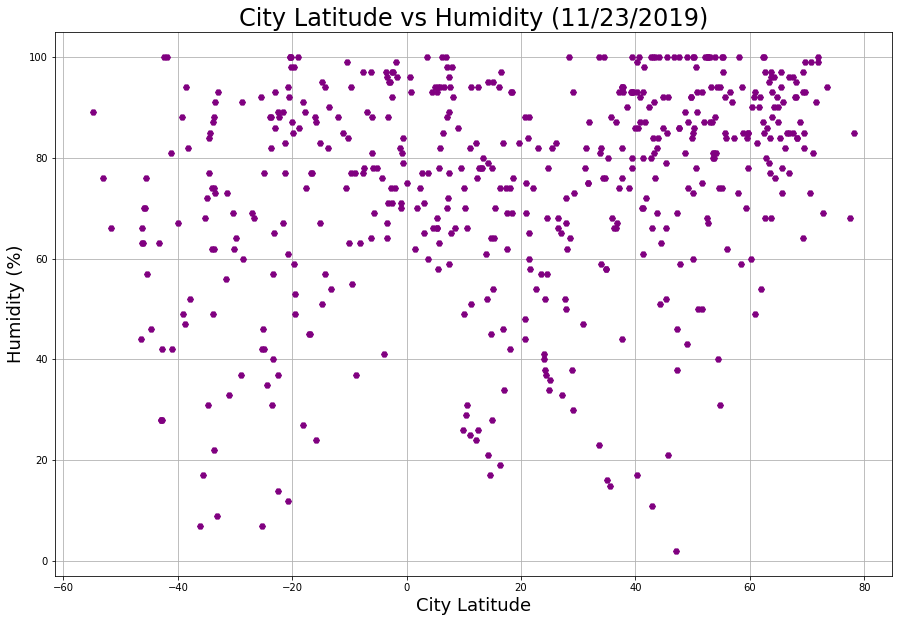

In [35]:
# Humidity (%) vs. Latitude

plt.figure(figsize=(15, 10))
plt.grid(True, zorder=1)
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker="H", color = 'purple', zorder=2)
plt.title(f"City Latitude vs Humidity (" + time.strftime("%m/%d/%Y") + ")", fontsize=24)
plt.xlabel("City Latitude", fontsize=18)
plt.ylabel("Humidity (%)", fontsize=18)
plt.savefig("LATvsHUMIDITY.png")
plt.show()